In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [135]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [136]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)
    
def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [137]:
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'

airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
filepath = os.path.join(base_dir,'Makerere','one_feature')
sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulago','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)', 'one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','one_feature')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Rubaga_Kabusu','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Rubaga_Kabusu','one_feature')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Kireka','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Kireka','one_feature')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Nsambya(American_Embassy)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Nsambya(American_Embassy)','one_feature')
#sensor_type = 2

airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,5.52,6.93,9.73,18,0.2133,0.3988,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,7.89,9.97,14.24,19,0.2133,0.3988,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,9.55,12.09,16.99,20,0.2133,0.3988,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,10.09,12.97,18.97,21,0.2133,0.3988,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,9.66,12.53,18.17,22,0.2133,0.3988,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,10.01,12.87,18.33,23,0.2133,0.3988,90,0.0,87.77,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,9.37,11.92,16.35,0,0.2133,0.3988,91,0.0,87.74,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,9.29,11.66,15.12,1,0.2133,0.3988,91,0.0,87.67,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,9.91,12.43,15.28,2,0.2133,0.3988,89,0.0,87.63,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,8.61,10.61,12.72,3,0.2133,0.3988,89,0.0,87.59,...,19.78,0.69,1,0,0,0,0,0,0,0


In [138]:
airquality_data_copy = airquality_data.copy()
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [139]:
if sensor_type == 0:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM1(Ug/m3)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 1:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 2:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)'], axis=1)
    
#temperature

In [140]:
airquality_data_for_selected_features.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,6.93
2017-09-09 19:00:00,9.97
2017-09-09 20:00:00,12.09
2017-09-09 21:00:00,12.97
2017-09-09 22:00:00,12.53


In [141]:
airquality_data_for_selected_features.tail()

,PM2.5(Ug/m3)
TimeStamp,
2019-03-31 19:00:00,6.00
2019-03-31 20:00:00,5.88
2019-03-31 21:00:00,6.35
2019-03-31 22:00:00,7.54
2019-03-31 23:00:00,8.72


In [142]:
show_dataframe_info(airquality_data_for_selected_features)

(12485, 1)
['PM2.5(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12485 entries, 2017-09-09 18:00:00 to 2019-03-31 23:00:00
Data columns (total 1 columns):
PM2.5(Ug/m3)    12485 non-null float64
dtypes: float64(1)
memory usage: 195.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM2.5(Ug/m3)    float64
dtype: object


In [143]:
airquality_data_for_selected_features.describe()

,PM2.5(Ug/m3)
count,12485.000000
mean,10.673821
std,7.022369
min,0.010000
25%,6.790000
50%,10.820000
75%,12.430000
max,210.400000


### Separate Features From the Target

In [144]:
airquality_data_for_selected_features.columns

Index(['PM2.5(Ug/m3)'], dtype='object')

In [145]:
airquality_data_for_selected_features = airquality_data_for_selected_features.values


### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [146]:
training_data_length = math.floor(len(airquality_data_for_selected_features)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data_for_selected_features)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data_for_selected_features)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

8739
1248
2497
12484


In [147]:
training_data = airquality_data_for_selected_features[0:training_data_length,:]
print(training_data.shape)

validation_data = airquality_data_for_selected_features[training_data_length:training_data_length+validation_data_length,:]
print(validation_data.shape)

testing_data = airquality_data_for_selected_features[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data.shape)


(8739, 1)
(1248, 1)
(2497, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (e.g 3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

In [148]:
def generate_dataset_in_format_lstm_can_ingest(data, look_back=1):
    x_data, y_data = [], []
    for i in range(len(data)-look_back-1):
        feature_data = data[i:(i+look_back), 0]
        x_data.append(feature_data)
        y_data.append(data[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [149]:
def generate_multivariate_dataset_in_format_lstm_can_ingest(data, number_of_inputs, number_of_outputs, dropnan=True):
    number_of_variables = 1 if type(data) is list else data.shape[1]
    data_frame= pd.DataFrame(data)
    columnsx, names = list(),list()
    #generate input sequence (t-n, ... t-1)
    for i in range(number_of_inputs, 0, -1):
        columnsx.append(data_frame.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(number_of_variables)]
       # forecast sequence (t, t+1, ... t+n)
    for i in range(0, number_of_outputs):
        columnsx.append(data_frame.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(number_of_variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(number_of_variables)]
            
    aggregated_df = pd.concat(columnsx, axis=1)
    aggregated_df.columns = names
    
    if dropnan:
        aggregated_df.dropna(inplace=True)
    return aggregated_df
    

### given data that goes back a number of timesteps e.g 3hrs, can we predict the next hour.

### training dataset

In [150]:
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(training_data)
# reshape into X=t and Y=t+1 timesteps = lookback
timesteps = 1
number_of_features = 1
scaled_training_features, training_targets = generate_dataset_in_format_lstm_can_ingest(scaled_training_data, timesteps)
# reshape input to [samples, time steps, features]

scaled_training_features_with_original_shape = scaled_training_features
scaled_training_features = np.reshape(scaled_training_features, 
                                      (scaled_training_features.shape[0], timesteps, scaled_training_features.shape[1]))


### validation dataset

In [151]:
scaled_validation_data = scaler.fit_transform(validation_data)
#print(scaled_validation_data)

scaled_validation_features, validation_targets = generate_dataset_in_format_lstm_can_ingest(scaled_validation_data, timesteps)
# reshape input to [samples, time steps, features]
scaled_validation_features = np.reshape(scaled_validation_features, (scaled_validation_features.shape[0], 
                                                                     timesteps, scaled_validation_features.shape[1]))

### Testing dataset

In [152]:
scaled_testing_data = scaler.fit_transform(testing_data)
scaled_testing_features, testing_targets = generate_dataset_in_format_lstm_can_ingest(scaled_testing_data, timesteps)
scaled_testing_features_with_original_shape = scaled_testing_features
scaled_testing_features = np.reshape(scaled_testing_features, (scaled_testing_features.shape[0], 
                                                                     timesteps, scaled_testing_features.shape[1]))

In [153]:
testing_data[0:2]

array([[5.05],
       [5.59]])

In [154]:
testing_targets[0:2]

array([0.02592029, 0.02962998])

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [155]:
scaled_training_features.shape

(8737, 1, 1)

In [156]:
training_targets.shape

(8737,)

In [157]:
scaled_training_features_with_original_shape.shape

(8737, 1)

In [158]:
testing_targets.shape

(2495,)

In [159]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features_with_original_shape, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features_with_original_shape)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.09832315 0.09940694 0.10094451 ... 0.10264071 0.10021922 0.09998242]


In [160]:
print(training_targets.shape)
print(training_targets.reshape(-1,1).shape)

(8737,)
(8737, 1)


In [161]:
training_targets.ravel().shape

(8737,)

In [162]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

kernel =  ConstantKernel(1.0) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=RBF(1))

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(scaled_training_features_with_original_shape,training_targets.reshape(-1,1))
#gp.fit(scaled_training_features_with_original_shape[0:50,:],training_targets[0:50].reshape(-1,1))

gp_predictions, sigma = gp.predict(scaled_testing_features_with_original_shape, return_std=True)
print(gp_predictions.shape)

gp_regression_score = gp.score(scaled_testing_features_with_original_shape, testing_targets)
print(gp_regression_score)

In [165]:
svr_predictions = svr_predictions.reshape(-1, 1)
svr_predictions.shape

(2495, 1)

In [166]:
scaled_testing_targets = testing_targets.reshape(-1,1)
scaled_testing_targets.shape

(2495, 1)

In [167]:
scaled_testing_targets.shape

(2495, 1)

In [168]:
scaled_testing_features_with_original_shape.shape

(2495, 1)

### inverting the predictions and actual values from standardized form

In [169]:
testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
svr_testing_predictions_unscaled = scaler.inverse_transform(svr_predictions)

In [170]:
### changing shape of the arrays to those that can be used in creating dataframes

In [171]:
svr_testing_predictions_unscaled = scaler.inverse_transform(svr_predictions)
svr_mae = mean_absolute_error(testing_targets_unscaled, svr_testing_predictions_unscaled)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets_unscaled, svr_testing_predictions_unscaled)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets_unscaled.ravel(), 'Predicted PM2.5':svr_testing_predictions_unscaled.ravel()}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  12.99
SVR RMSE:  14.33


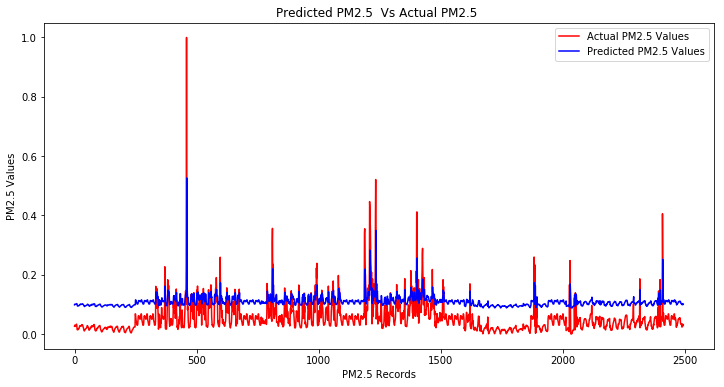

In [172]:
fig_svr_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_svr_predictions_vs_actual = fig_svr_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(svr_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5  Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()
fig_svr_predictions_vs_actual.savefig(os.path.join(filepath, 'svr_model_prediction_vs_actual.png'))

In [173]:
scaled_training_features.shape[1]

1

In [174]:
gp_testing_predictions_unscaled = scaler.inverse_transform(gp_predictions)
gp_mae = mean_absolute_error(testing_targets_unscaled, gp_testing_predictions_unscaled)
print('GP MAE: ', gp_mae.round(2))
gp_rmse = calculate_rmse(testing_targets_unscaled, gp_testing_predictions_unscaled)
print('GP RMSE: ', gp_rmse.round(2))
gp_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets_unscaled.ravel(), 'Predicted PM2.5':gp_testing_predictions_unscaled.ravel()}) 
gp_prediction_vs_actual_dataframe

## save predictions by gp
gp_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'gp_predictions.csv'))

GP MAE:  9.72
GP RMSE:  14.63


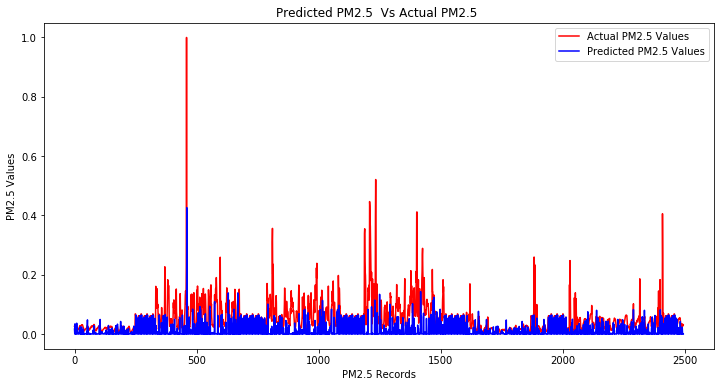

In [175]:
fig_gp_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_gp_predictions_vs_actual = fig_gp_predictions_vs_actual.add_subplot(111)
plt.plot(testing_targets, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(gp_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('Predicted PM2.5 Vs Actual PM2.5 ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()
fig_gp_predictions_vs_actual.savefig(os.path.join(filepath, 'gp_model_prediction_vs_actual.png'))

### saving results to file

In [176]:
with open(os.path.join(filepath, "results_summary_gaussian_process_model.txt"), "w+") as text_file:
        print("GP RMSE: {} \n GP MAE: {}"
              .format(gp_rmse.round(2), gp_mae.round(2)), file=text_file)